In [1]:
import os

import pandas as pd

os.chdir('../')
print(os.getcwd())

/Users/Placebo/OMSCS/CS7641-ML/MachineLearningProjects/UnsupervisedLearning


In [2]:
import pandas as pd

In [12]:
%load_ext autoreload
%autoreload 2
from src.utlis.data_loader import load_processed_data, save_csv
from src.utlis.plotting import plot_metrics_vs_cluster
from src.experiments.experiment1_clustering import ClusteringExperiment

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Dataset 1

In [13]:
X_train, _, _, _ = load_processed_data('data/dataset1')

dataset = 'dataset1'
experiment = 'experiment1'

## Running clustering analysis

In [5]:
experiment = ClusteringExperiment()
kmean_metrics, em_metrics = experiment.run_clustering_analysis(X_train, [2, 3, 4, 5, 6, 7, 8, 9, 10])

In [14]:
# save the metrics
save_csv(kmean_metrics, f'results/{dataset}/{experiment}', 'kmean_metrics')
save_csv(em_metrics, f'results/{dataset}/{experiment}', 'em_metrics')

Dataframe saved at results/dataset1/experiment1/kmean_metrics.csv
Dataframe saved at results/dataset1/experiment1/em_metrics.csv


In [6]:
kmean_metrics

,k,inertia,silhouette_score,calinski_harabasz_score
0,2,242217.162993,0.356298,15955.205776
1,3,218935.132103,0.328759,10577.508308
2,4,201482.086697,0.316308,8613.576026
3,5,188935.601997,0.165136,7435.911178
4,6,172862.321850,0.175728,7114.310496
5,7,166622.963009,0.163640,6356.003767
6,8,150718.297115,0.192366,6519.333797
7,9,145803.318372,0.182262,6035.330531
8,10,137264.522294,0.180765,5925.975385


In [7]:
em_metrics

,k,bic,aic,silhouette_score,calinski_harabasz_score
0,2,-3.908654e+06,-3.916981e+06,0.351659,15756.646518
1,3,-4.288376e+06,-4.300871e+06,0.328779,10575.345839
2,4,-4.646596e+06,-4.663259e+06,0.105896,7698.849624
3,5,-5.053826e+06,-5.074656e+06,0.060743,5549.354114
4,6,-5.197423e+06,-5.222421e+06,0.065142,4790.882108
5,7,-5.496099e+06,-5.525264e+06,0.134725,4651.982121
6,8,-5.829355e+06,-5.862689e+06,0.107209,4145.348704
7,9,-6.239176e+06,-6.276678e+06,0.094386,3712.646387
8,10,-6.064042e+06,-6.105711e+06,0.094827,3631.795055


## Plotting metrics vs number of clusters

### KMeans

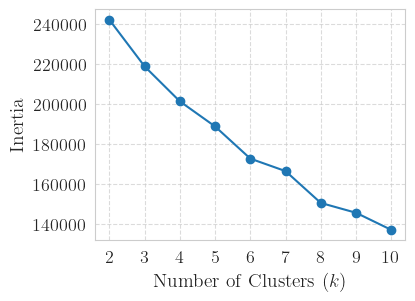

Plot saved at figs/dataset1/experiment1/inertia_vs_k_kmeans.png


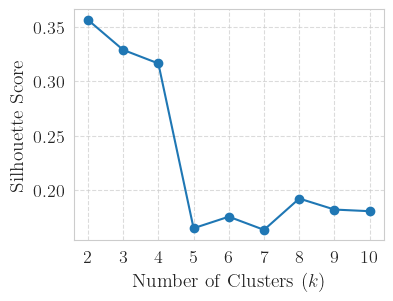

Plot saved at figs/dataset1/experiment1/silhouette_score_vs_k_kmeans.png


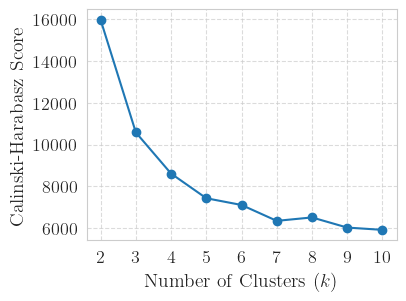

Plot saved at figs/dataset1/experiment1/calinski_harabasz_score_vs_k_kmeans.png


In [8]:
plot_metrics_vs_cluster(
    df = kmean_metrics,
    metric_col = 'inertia',
    k_col = 'k',
    dataset = 'dataset1',
    experiment = 'experiment1',
    algo_name='kmeans'
)

plot_metrics_vs_cluster(
    df = kmean_metrics,
    metric_col = 'silhouette_score',
    k_col = 'k',
    dataset = 'dataset1',
    experiment = 'experiment1',
    algo_name='kmeans'
)

plot_metrics_vs_cluster(
    df = kmean_metrics,
    metric_col = 'calinski_harabasz_score',
    k_col = 'k',
    dataset = 'dataset1',
    experiment = 'experiment1',
    algo_name='kmeans'
)

### EM


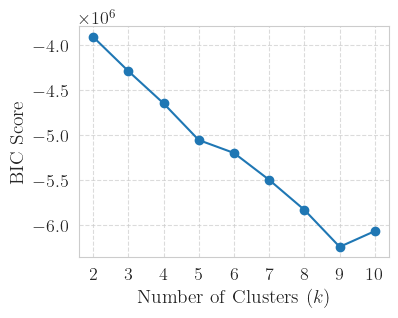

Plot saved at figs/dataset1/experiment1/bic_vs_k_em.png


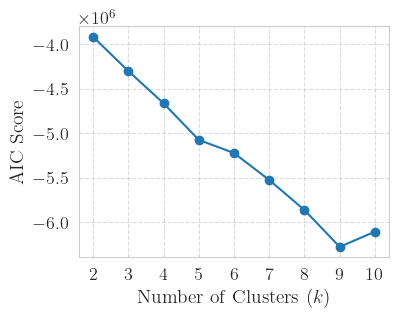

Plot saved at figs/dataset1/experiment1/aic_vs_k_em.png


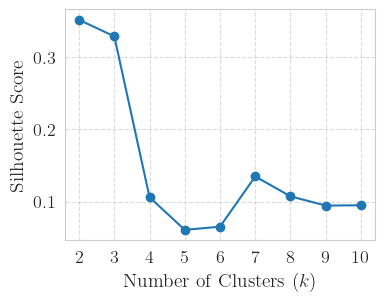

Plot saved at figs/dataset1/experiment1/silhouette_score_vs_k_em.png


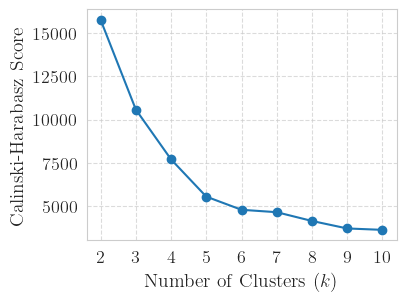

Plot saved at figs/dataset1/experiment1/calinski_harabasz_score_vs_k_em.png


In [9]:
plot_metrics_vs_cluster(
    df = em_metrics,
    metric_col = 'bic',
    k_col = 'k',
    dataset = 'dataset1',
    experiment = 'experiment1',
    algo_name='em'
)

plot_metrics_vs_cluster(
    df = em_metrics,
    metric_col = 'aic',
    k_col = 'k',
    dataset = 'dataset1',
    experiment = 'experiment1',
    algo_name='em'
)

plot_metrics_vs_cluster(
    df = em_metrics,
    metric_col = 'silhouette_score',
    k_col = 'k',
    dataset = 'dataset1',
    experiment = 'experiment1',
    algo_name='em'
)

plot_metrics_vs_cluster(
    df = em_metrics,
    metric_col = 'calinski_harabasz_score',
    k_col = 'k',
    dataset = 'dataset1',
    experiment = 'experiment1',
    algo_name='em'
)



## Combine EM and KMeans metrics

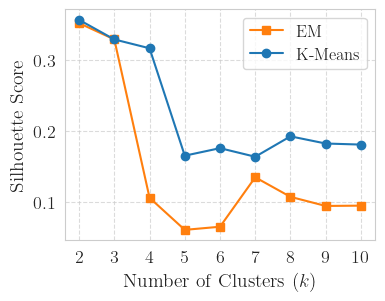

Plot saved at figs/dataset1/experiment1/silhouette_score_vs_k_em_kmeans.png


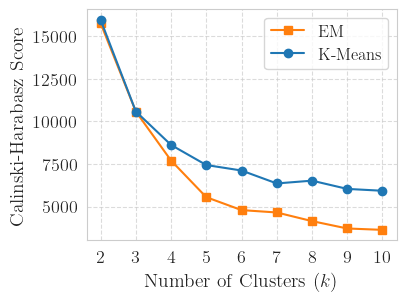

Plot saved at figs/dataset1/experiment1/calinski_harabasz_score_vs_k_em_kmeans.png


In [10]:
kmean_metrics_copy = kmean_metrics[['k', 'silhouette_score', 'calinski_harabasz_score']].copy()
kmean_metrics_copy['algo'] = 'kmeans'
em_metrics_copy = em_metrics[['k', 'silhouette_score', 'calinski_harabasz_score']].copy()
em_metrics_copy['algo'] = 'em'

combined_metrics = pd.concat([kmean_metrics_copy, em_metrics_copy], axis=0)
# draw the combined plot
plot_metrics_vs_cluster(
    df = combined_metrics,
    metric_col = 'silhouette_score',
    k_col = 'k',
    group_col= 'algo',
    dataset = 'dataset1',
    experiment = 'experiment1'
)

plot_metrics_vs_cluster(
    df = combined_metrics,
    metric_col = 'calinski_harabasz_score',
    k_col = 'k',
    group_col= 'algo',
    dataset = 'dataset1',
    experiment = 'experiment1'
)

# Dataset 2

In [15]:
X_train, _, _, _ = load_processed_data('data/dataset2')
dataset = 'dataset2'
experiment = 'experiment1'

## Running clustering analysis

In [16]:
experiment = ClusteringExperiment()
kmean_metrics, em_metrics = experiment.run_clustering_analysis(X_train, [2, 3, 4, 5, 6, 7, 8, 9, 10])

# save the metrics
save_csv(kmean_metrics, f'results/{dataset}/{experiment}', 'kmean_metrics')
save_csv(em_metrics, f'results/{dataset}/{experiment}', 'em_metrics')

Dataframe saved at results/dataset2/<src.experiments.experiment1_clustering.ClusteringExperiment object at 0x12a31f3d0>/kmean_metrics.csv
Dataframe saved at results/dataset2/<src.experiments.experiment1_clustering.ClusteringExperiment object at 0x12a31f3d0>/em_metrics.csv


## Plotting metrics vs number of clusters

### KMeans

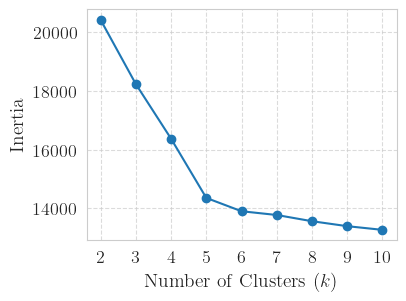

Plot saved at figs/dataset2/<src.experiments.experiment1_clustering.ClusteringExperiment object at 0x12a31f3d0>/inertia_vs_k_kmeans.png


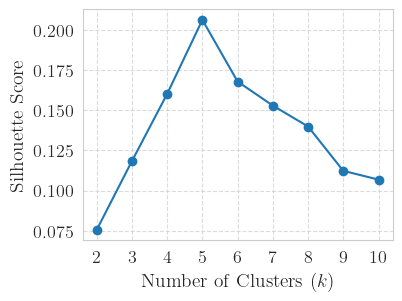

Plot saved at figs/dataset2/<src.experiments.experiment1_clustering.ClusteringExperiment object at 0x12a31f3d0>/silhouette_score_vs_k_kmeans.png


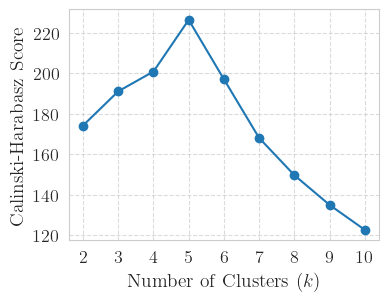

Plot saved at figs/dataset2/<src.experiments.experiment1_clustering.ClusteringExperiment object at 0x12a31f3d0>/calinski_harabasz_score_vs_k_kmeans.png


In [17]:
plot_metrics_vs_cluster(
    df = kmean_metrics,
    metric_col = 'inertia',
    k_col = 'k',
    dataset = dataset,
    experiment = experiment,
    algo_name='kmeans'
)

plot_metrics_vs_cluster(
    df = kmean_metrics,
    metric_col = 'silhouette_score',
    k_col = 'k',
    dataset = dataset,
    experiment = experiment,
    algo_name='kmeans'
)

plot_metrics_vs_cluster(
    df = kmean_metrics,
    metric_col = 'calinski_harabasz_score',
    k_col = 'k',
    dataset = dataset,
    experiment = experiment,
    algo_name='kmeans'
)

### EM

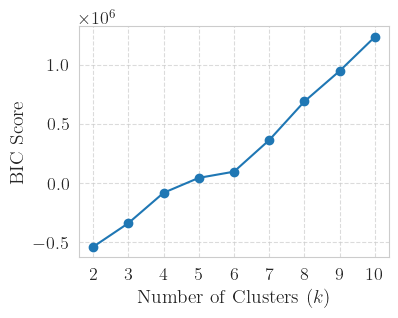

Plot saved at figs/dataset2/<src.experiments.experiment1_clustering.ClusteringExperiment object at 0x12a31f3d0>/bic_vs_k_em.png


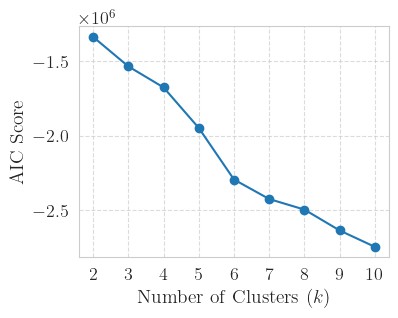

Plot saved at figs/dataset2/<src.experiments.experiment1_clustering.ClusteringExperiment object at 0x12a31f3d0>/aic_vs_k_em.png


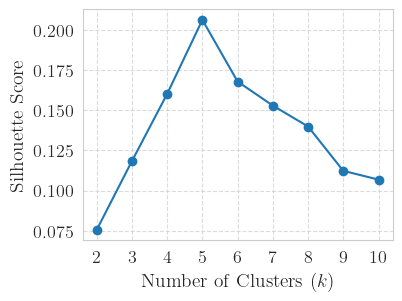

Plot saved at figs/dataset2/<src.experiments.experiment1_clustering.ClusteringExperiment object at 0x12a31f3d0>/silhouette_score_vs_k_em.png


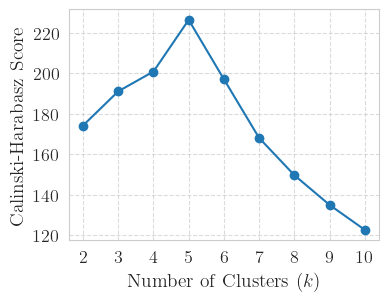

Plot saved at figs/dataset2/<src.experiments.experiment1_clustering.ClusteringExperiment object at 0x12a31f3d0>/calinski_harabasz_score_vs_k_em.png


In [18]:
plot_metrics_vs_cluster(
    df = em_metrics,
    metric_col = 'bic',
    k_col = 'k',
    dataset = dataset,
    experiment = experiment,
    algo_name='em'
)

plot_metrics_vs_cluster(
    df = em_metrics,
    metric_col = 'aic',
    k_col = 'k',
    dataset = dataset,
    experiment = experiment,
    algo_name='em'
)

plot_metrics_vs_cluster(
    df = em_metrics,
    metric_col = 'silhouette_score',
    k_col = 'k',
    dataset = dataset,
    experiment = experiment,
    algo_name='em'
)

plot_metrics_vs_cluster(
    df = em_metrics,
    metric_col = 'calinski_harabasz_score',
    k_col = 'k',
    dataset = dataset,
    experiment = experiment,
    algo_name='em'
)

## Combine EM and KMeans metrics

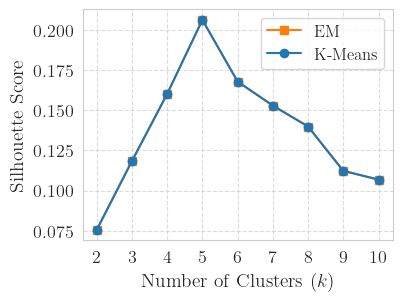

Plot saved at figs/dataset2/<src.experiments.experiment1_clustering.ClusteringExperiment object at 0x12a31f3d0>/silhouette_score_vs_k_em_kmeans.png


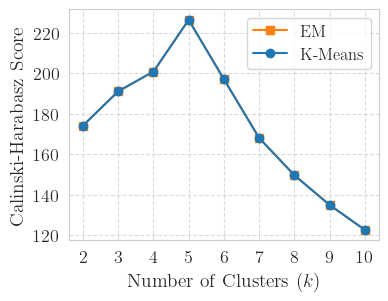

Plot saved at figs/dataset2/<src.experiments.experiment1_clustering.ClusteringExperiment object at 0x12a31f3d0>/calinski_harabasz_score_vs_k_em_kmeans.png


In [20]:
kmean_metrics_copy = kmean_metrics[['k', 'silhouette_score', 'calinski_harabasz_score']].copy()
kmean_metrics_copy['algo'] = 'kmeans'
em_metrics_copy = em_metrics[['k', 'silhouette_score', 'calinski_harabasz_score']].copy()
em_metrics_copy['algo'] = 'em'

combined_metrics = pd.concat([kmean_metrics_copy, em_metrics_copy], axis=0)
# draw the combined plot
plot_metrics_vs_cluster(
    df = combined_metrics,
    metric_col = 'silhouette_score',
    k_col = 'k',
    group_col= 'algo',
    dataset = dataset,
    experiment = experiment
)

plot_metrics_vs_cluster(
    df = combined_metrics,
    metric_col = 'calinski_harabasz_score',
    k_col = 'k',
    group_col= 'algo',
    dataset = dataset,
    experiment = experiment
)